# Project 1: Data Scraping and cleaning

Mukun Guo

2020.03.09

In [1]:
from bs4 import BeautifulSoup
from bs4.element import Tag, NavigableString
import pandas as pd
import re
from requests import get
import csv
from datetime import datetime
import time
import warnings
from math import exp
warnings.filterwarnings('ignore')

## Part 1: Data Scraping and cleaning

### Step 1: Scrape your competitor’s data

In [2]:
url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares'
response = get(url)

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
table = soup.find('table', attrs = {'class': 'table'}).find('tbody').findAll('tr')
solar_flares = []
for row in table:
    attrs = row.findAll('td')
    solar_flare = {}
    solar_flare['rank'] = attrs[0].text
    solar_flare['flare_classification'] = attrs[1].text
    solar_flare['date'] = attrs[2].text
    solar_flare['flare_region'] = attrs[3].text
    solar_flare['start_time'] = attrs[4].text
    solar_flare['maximum_time'] = attrs[5].text
    solar_flare['end_time'] = attrs[6].text
    solar_flare['movie'] = attrs[7].text
    solar_flares.append(solar_flare)
print(solar_flares[0])

{'rank': '1', 'flare_classification': 'X28+', 'date': '2003/11/04', 'flare_region': '0486', 'start_time': '19:29', 'maximum_time': '19:53', 'end_time': '20:06', 'movie': ' MovieView archive'}


write to .csv files

In [5]:
filename = 'solar_flares.csv'
with open(filename, 'w') as f:
    w = csv.DictWriter(f, ['rank', 'flare_classification', 'date','flare_region', 'start_time', 'maximum_time', 'end_time', 'movie'])
    w.writeheader()
    for solar_flare in solar_flares:
        w.writerow(solar_flare)

### Step 2: Tidy the top 50 solar flare data

In [6]:
solar_flares = pd.read_csv('solar_flares.csv')
solar_flares.head()

,rank,flare_classification,date,flare_region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


1. Drop the last column

In [7]:
try:
    del solar_flares['movie']
except:
    print('INFO: The operation has been done')
solar_flares.head(3)

,rank,flare_classification,date,flare_region,start_time,maximum_time,end_time
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24


2. Combine date and time columns

In [8]:
try:
    solar_flares['start_datetime'] = solar_flares['date'] + ' ' + solar_flares['start_time']
    solar_flares['maximum_datetime'] = solar_flares['date'] + ' ' + solar_flares['maximum_time']
    solar_flares['end_datetime'] = solar_flares['date'] + ' ' + solar_flares['end_time']
    del solar_flares['start_time']
    del solar_flares['end_time']
    del solar_flares['maximum_time']
    del solar_flares['date']
except:
    print('INFO: The operation has been done')
solar_flares.head()

,rank,flare_classification,flare_region,start_datetime,maximum_datetime,end_datetime
0,1,X28+,486,2003/11/04 19:29,2003/11/04 19:53,2003/11/04 20:06
1,2,X20+,9393,2001/04/02 21:32,2001/04/02 21:51,2001/04/02 22:03
2,3,X17.2+,486,2003/10/28 09:51,2003/10/28 11:10,2003/10/28 11:24
3,4,X17+,808,2005/09/07 17:17,2005/09/07 17:40,2005/09/07 18:03
4,5,X14.4,9415,2001/04/15 13:19,2001/04/15 13:50,2001/04/15 13:55


3. Parse columns containing datetimes into actual datetime objects

In [9]:
mapToDatetime = lambda dt_str: datetime.strptime(dt_str, '%Y/%m/%d %H:%M')

try:
    solar_flares['start_datetime'] = solar_flares['start_datetime'].map(mapToDatetime)
except:
    print('INFO: No need to parse "start_datetime" column')
try:
    solar_flares['maximum_datetime'] = solar_flares['maximum_datetime'].map(mapToDatetime)
except:
    print('INFO: No need to parse "maximum_datetime" column')
try:
    solar_flares['end_datetime'] = solar_flares['end_datetime'].map(mapToDatetime)
except:
    print('INFO: No need to parse "end_datetime" column')
solar_flares.head(10)

,rank,flare_classification,flare_region,start_datetime,maximum_datetime,end_datetime
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [10]:
solar_flares.to_csv('./solar_flares_tidy.csv', index=False)

### Step 3: Scrape the NASA data

In [11]:
url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
response = get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [12]:
content = soup.find('pre')
data = []
prev = []
temp = []
prev_word = ''

for i, row in enumerate(content):
    if i == 0:
        row = row[800:]
    if type(row) is str or type(row) is NavigableString:
        if row.isspace():
            continue
        row = row.strip(' \n\r\t')
        row = re.split(r'[\n\s]\s*', row)
    elif type(row) is Tag:
        row = row.text
        row = row.strip(' \n\r\t')
        row = re.split(r'[\n\s]\s*', row)
    if row:
        if temp:
            prev_word = temp[-1]
        else:
            prev_word = ''
        for word in row:
            if prev_word == 'PHTX':
                if word[0] == '1' or word[0] == '2':
                    temp.append(word)
                    prev_word = word
            else:
                temp.append(word)
            
        if len(temp) > 15:
            data.append(temp[:15])
            temp = temp[15:]


for i, _ in enumerate(data):
    data[i] = _[:-1]

        
filename = 'nasa.csv'
headers = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed' ]
with open(filename, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerows(data)


### Step 4: Tidy the NASA Table

In [13]:
nasa_table = pd.read_csv('./nasa.csv')
nasa_table.head(3)

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464


In [14]:
nasa_table = pd.read_csv('./nasa.csv')

# 1. replace any missing entries as `NA`
# start_frequency and end_frequency
nasa_table['start_frequency'] = nasa_table['start_frequency'].replace(['????'], 'NA')
nasa_table['end_frequency'] = nasa_table['end_frequency'].replace(['????'], 'NA')

# flare_region
nasa_table['flare_region'] = nasa_table['flare_region'].replace(['-----'], 'NA')

# flare_classification (Soft X-ray flare importance)
nasa_table['flare_classification'] = nasa_table['flare_classification'].replace(['----'], 'NA').replace(['FILA'], 'NA').replace(['DSF'], 'NA')

# cme_date
nasa_table['cme_date'] = nasa_table['cme_date'].replace(['--/--'], 'NA')

# cme_time
nasa_table['cme_time'] = nasa_table['cme_time'].replace(['--:--'], 'NA')

# cme_angle
nasa_table['cme_angle'] = nasa_table['cme_angle'].replace(['----'], 'NA')

# cme_width
nasa_table['cme_width'] = nasa_table['cme_width'].replace(['----'], 'NA')

# cme_speed
nasa_table['cme_speed'] = nasa_table['cme_speed'].replace(['----'], 'NA')


# 2. create a "is_halo" column and replace `Halo` in cme_angle as `NA`
# create a new "is_halo" column
nasa_table['is_halo'] = nasa_table['cme_angle'] == 'Halo'

# replace "Halo" with "NA"
nasa_table['cme_angle'] = nasa_table['cme_angle'].replace(['Halo'], 'NA')


# 3. create a "is_lower_bound" column and remove any non-numeric part of the width column
# create a new "is_lower_bound" column
not_numeric = lambda s: not s.isnumeric()
nasa_table['is_lower_bound'] = nasa_table['cme_width'].map(not_numeric)

# replace non-numeric part of the width column
removeNonNumeric = lambda s: re.sub('[^0-9]','', s)
nasa_table['cme_width'] = nasa_table['cme_width'].map(removeNonNumeric)


# 4. Combine date and time columns for `start`, `end` and `cme` so they can be encoded as datetime objects
headers = nasa_table.columns.tolist()
nasa_table['start_datetime'] = nasa_table['start_date'] + ' ' + nasa_table['start_time']
nasa_table['end_datetime'] = nasa_table['start_date'].map(lambda s: s[:5]) + nasa_table['end_date'] + ' ' + nasa_table['end_time']
nasa_table['cme_datetime'] = nasa_table['start_date'].map(lambda s: s[:5]) + nasa_table['cme_date'] + ' ' + nasa_table['cme_time']

for h in ['start_date', 'start_time', 'end_date', 'end_time', 'cme_date', 'cme_time']:
    headers.remove(h)
headers = ['start_datetime', 'end_datetime', 'cme_datetime'] + headers
nasa_table = nasa_table[headers]


# 5. Convert to datetime object
fixTime = lambda dt_str: dt_str.replace('24:00', '00:00')
    
mapToDatetime = lambda dt_str: datetime.strptime(dt_str, '%Y/%m/%d %H:%M')
nasa_table['start_datetime'] = nasa_table['start_datetime'].map(fixTime).map(mapToDatetime)
nasa_table['end_datetime'] = nasa_table['end_datetime'].map(fixTime).map(mapToDatetime)

def mapCme(dt_str):
    if 'NA' in dt_str:
        return 'NA'
    dt_obj = fixTime(dt_str)
    dt_obj = mapToDatetime(dt_obj)
    return dt_obj
nasa_table['cme_datetime'] = nasa_table['cme_datetime'].map(mapCme)


# Save
nasa_table.to_csv('nasa_tidy.csv', index=False)
nasa_table.head(3)

,start_datetime,end_datetime,cme_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_angle,cme_width,cme_speed,is_halo,is_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,1997-04-01 15:18:00,8000,4000,S25E16,8026,M1.3,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,1997-04-07 14:27:00,11000,1000,S28E19,8027,C6.8,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,1997-05-12 05:30:00,12000,80,N21W08,8038,C1.3,NA,360,464,True,False


## Part 2: Analysis

### Question 1: Replication

In [15]:
nasa = pd.read_csv('./nasa_tidy.csv')
solar_flares = pd.read_csv('./solar_flares_tidy.csv')

# remove the plus sign in the solar_flares dataset
removePlusSign = lambda s: re.sub('\+','', s)
solar_flares['flare_classification'] = solar_flares['flare_classification'].map(removePlusSign)

# create two new columns corresponding to the letter and number fraction of 'flare_classification' column
def mapToLetter(s):
    if type(s) == str and s != 'NA':
        return s[0]
    else:
        return 'NA'
def mapToNum(s):
    if type(s) == str and s != 'NA':
        return float(s[1:])
    else:
        return 'NA'
solar_flares['classification_letter'] = solar_flares['flare_classification'].map(mapToLetter)
solar_flares['classification_num'] = solar_flares['flare_classification'].map(mapToNum)
nasa['classification_letter'] = nasa['flare_classification'].map(mapToLetter)
nasa['classification_num'] = nasa['flare_classification'].map(mapToNum)

letters = list(solar_flares['classification_letter'])
nums = list(solar_flares['classification_num'])
nasa_top_flares = nasa.loc[nasa['classification_letter'].isin(letters)]
nasa_top_flares = nasa_top_flares.loc[nasa_top_flares['classification_num'].isin(nums)]

print('Successfully replicated {} records'.format(len(nasa_top_flares)))
solar_flares.head()


Successfully replicated 35 records


,rank,flare_classification,flare_region,start_datetime,maximum_datetime,end_datetime,classification_letter,classification_num
0,1,X28,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,X,28.0
1,2,X20,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,X,20.0
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,X,17.2
3,4,X17,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,X,17.0
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,X,14.4


Here we only consider the "flare_classification" attribute to replicate the top 50 solar flares. However, by using this attribute solely, I am only able to retrieve 35 records. To see how well this method actually performs, we could do the following operation to manually check it. Here we use date for filtering because it's very unlikely that the two websites recorded the same solar flare with different dates

In [16]:
# retrieve all the dates in the top 50 solar flares dataset
retrieveDate = lambda dt_str: dt_str[:10]
dates = list(solar_flares['start_datetime'].map(retrieveDate))

# retrieve all the solar flares happened in these days
nasa['date'] = nasa['start_datetime'].map(retrieveDate)
candidate_solar_flares = nasa.loc[nasa['date'].isin(dates)]
nasa_top_flares['date'] = nasa_top_flares['start_datetime'].map(retrieveDate)
print('There are {} candidate solar flares'.format(len(candidate_solar_flares)))

# we check the difference between nasa_top_flares and candidate_solar_flares
difference = candidate_solar_flares.merge(nasa_top_flares, indicator=True, how='outer')
left_only = difference[difference['_merge'] == 'left_only']

left_only


There are 45 candidate solar flares


,start_datetime,end_datetime,cme_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_angle,cme_width,cme_speed,is_halo,is_lower_bound,classification_letter,classification_num,date,_merge
4,2001-04-02 11:30:00,2001-04-02 12:00:00,2001-04-02 11:26:00,14000.0,5000.0,N20W70,9393,X1.1,270.0,80.0,992.0,False,False,X,1.1,2001-04-02,left_only
7,2001-04-15 14:05:00,2001-04-16 13:00:00,2001-04-15 14:06:00,14000.0,40.0,S20W85,9415,X14.,245.0,167.0,1199.0,False,False,X,14,2001-04-15,left_only
10,2001-12-11 12:45:00,2001-12-11 17:00:00,2001-12-11 09:54:00,4500.0,750.0,SW90b,NaN,NaN,263.0,121.0,891.0,False,False,NA,NA,2001-12-11,left_only
12,2002-07-15 21:15:00,2002-07-16 05:00:00,2002-07-15 21:30:00,5000.0,175.0,N19W01,10030,M1.8,14.0,188.0,1300.0,False,True,M,1.8,2002-07-15,left_only
19,2003-11-02 09:23:00,2003-11-02 11:22:00,2003-11-02 09:30:00,14000.0,550.0,SW90b,NaN,NaN,NaN,360.0,2036.0,True,False,NA,NA,2003-11-02,left_only
24,2005-01-15 06:15:00,2005-01-15 09:30:00,2005-01-15 06:30:00,14000.0,150.0,N16E04,10720,M8.6,NaN,360.0,2049.0,True,False,M,8.6,2005-01-15,left_only
26,2005-01-17 09:25:00,2005-01-17 16:00:00,2005-01-17 09:30:00,14000.0,30.0,N15W25,10720,X2.0,NaN,360.0,2094.0,True,False,X,2,2005-01-17,left_only
29,2005-09-07 18:05:00,2005-09-08 00:00:00,NaN,12000.0,200.0,S11E77,10808,X1.7,NaN,NaN,NaN,False,True,X,1.7,2005-09-07,left_only
32,2006-12-06 02:00:00,2006-12-06 03:30:00,NaN,1000.0,200.0,S07E69,10930,M1.1,NaN,NaN,NaN,False,True,M,1.1,2006-12-06,left_only
33,2006-12-06 08:30:00,2006-12-06 09:45:00,NaN,4000.0,600.0,S04E63,10930,M6.0,NaN,NaN,NaN,False,True,M,6,2006-12-06,left_only


By the above result and manually checking the two datasets, we could conclude that the some entries in the top 50 solar flares dataset is missing in the nasa datasets, and others are failed to be repllicated. The reason could be the 'NA' in flare_classification column and difference in classification (e.g. X14 vs X14.4). This could be validated by manually checking the above dataframe

### Question 2: Entity Resolution

we consider 3 attributes to calculate the similarity score, datetime, solar_region, and classification. We translate datetime as hours and consider it as a continuous variable to calculate its similarity. If the two solar flares happen at the same region, we add 1 to the overall similarity score as flare region is considered as categorical attribute. Then we consider the letter section of classification as categorical and numeric section as numerical attribute, and calculate its similarity. Finally, we set the threshhold for overall similarity score to be 1, with the implication that one of the following is true: 1) they happen at about the same datetime and are about the same classification. 2) their classification or/and flare_region matches and some differences in datetime.

In [17]:
# first we fix the inconsistency in the flare_region column of the two datasets
def fixFlareRegion(s):
    s = str(s)
    if len(s) == 2 and s != 'NA':
        return '100' + s
    elif len(s) == 3:
        return '10' + s
    elif len(s) == 4:
        return '1' + s
    return s

nasa['flare_region'] = nasa['flare_region'].map(fixFlareRegion)
solar_flares['flare_region'] = solar_flares['flare_region'].map(fixFlareRegion)

# Write a function flare_similarity which computes a similarity s(e1,e2) between flares e1∈E1 and e2∈E2.
def flare_similarity(e1, e2):
    # use datetime, classification, and region to calculate similarity score
    score = 0
    # datetime
    fmt = '%Y-%m-%d %H:%M:%S'
    d1 = datetime.strptime(e1['start_datetime'], fmt)
    d2 = datetime.strptime(e2['start_datetime'], fmt)
    d1_ts = time.mktime(d1.timetuple())
    d2_ts = time.mktime(d2.timetuple())
    score += exp(-((d2_ts-d1_ts)/3600)**2)
#     score += 1.5 - (int(abs(d2_ts-d1_ts)) / 60 / 60)  # in hours

    # region
    if str(e1['flare_region']) == str(e2['flare_region']):
        score += 1
#     if e1['flare_region'] == 'NA' or e2['flare_region'] == 'NA':
#         score += 0.1

    # classification
    if e1['classification_letter'] == e2['classification_letter']:
        if e1['classification_num'] != 'NA' and e2['classification_num'] != 'NA':
            score += exp(-((e1['classification_num'] - e2['classification_num'])**2))
    return score

    
# Write a second function flare_match that computes for each flare e1∈E1 which flare e2∈E2 is the most similar.
def flare_match(flare_df1, flare_df2):
    indexes = []
    for i1, e1 in flare_df1.iterrows():
        idx = 0
        score = 0
        for i2, e2 in flare_df2.iterrows():
            cur_score = flare_similarity(e1, e2)
            if cur_score >= score:
                score = cur_score
                idx = i2
        if score > 1.1:
            indexes.append(idx + 2)
        else:
            indexes.append('NA')
    return indexes

indexes = flare_match(solar_flares, nasa)
sum = 0
for i in indexes:
    if i != 'NA':
        sum += 1
print('Find {} matches'.format(sum))
# Add the result of flare_match to the top 50 table as the index of the best matching row in the NASA table
solar_flares['flare_match'] = indexes

Find 39 matches


In [18]:
solar_flares.head(5)

,rank,flare_classification,flare_region,start_datetime,maximum_datetime,end_datetime,classification_letter,classification_num,flare_match
0,1,X28,10486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,X,28.0,242
1,2,X20,19393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,X,20.0,119
2,3,X17.2,10486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,X,17.2,235
3,4,X17,10808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,X,17.0,318
4,5,X14.4,19415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,X,14.4,128


### Question 3: Analysis

Here we want to explore the correlation among date of the solar flare, its cme speed, and its starting frequency by plotting the data.
In the plot below, the data is all the solar flares in the nasa dataset. The x-axis represents its CME speed while the y-axis represents the date and time that the solar flare happened. Color shows the starting frequency of the solar flare, with yellow being the highest and blue being the lowest.
From the plot, we can notice that there is not a clear correlation between CME speed and the starting frequency. However, we could see in recent years(2010-), the number of solar flares with higher starting frequency significantly increased. We could also notice that there are almost no solar flares between 2008 and 2010.

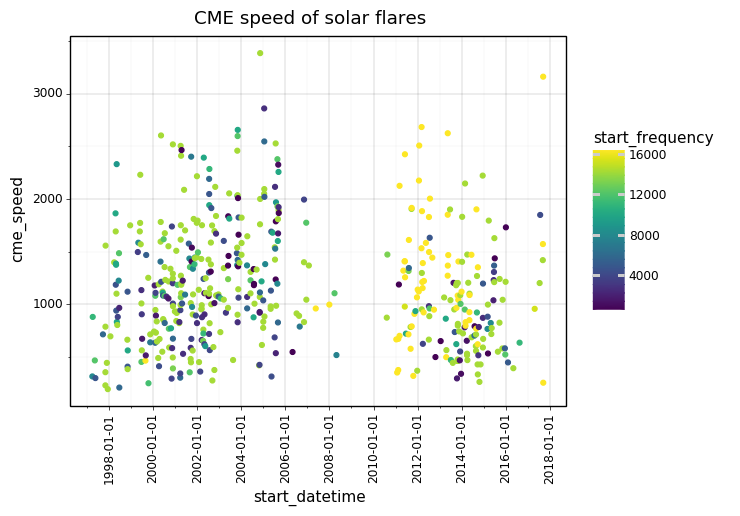

<ggplot: (7557734685)>

In [20]:
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format


theme_set(theme_linedraw())
(ggplot((nasa)
 ,aes(x='start_datetime', y='cme_speed', color='start_frequency'))
 +geom_point()
 +labs(title='CME speed of solar flares')
 +scale_x_datetime(breaks=date_breaks('2 year'))
 +theme(axis_text_x = element_text(angle=90))
)

